<a href="https://colab.research.google.com/github/aruntakhur/ConvexOptimization/blob/main/Copy_of_Resnet_50_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import warnings
from torchsummary import summary

from tqdm import tqdm
from time import sleep
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Data Preprocessing**

In [ ]:
#transform Function
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
    ])

In [ ]:
batch_size=512
num_classes=10
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Model Preparation**

In [ ]:
model=models.resnet50(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
#Modifying the output feature of the resnet50
num_classes=10
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total
loss_fn=nn.CrossEntropyLoss()

#Fundamental Method

Epoch 1: 100%|██████████| 98/98 [16:06<00:00,  9.86s/batch, accuracy=64.2, loss=1.23]


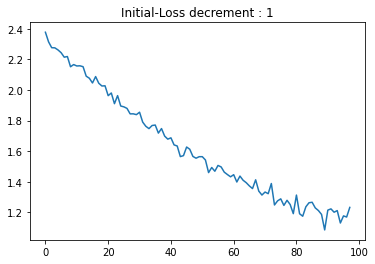

Epoch 2: 100%|██████████| 98/98 [16:02<00:00,  9.82s/batch, accuracy=76.2, loss=0.752]


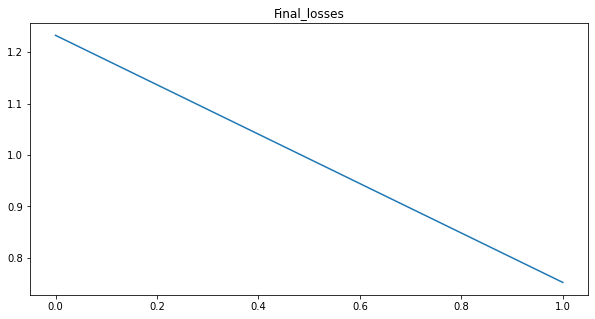

In [ ]:
model=model
learning_rate=0.01
valid_loss_min=np.Inf
loss_arr=[]
loss_epoch_arr=[]
train_accu=[]
test_accu=[]
max_epochs=2
tottal_step=len(trainloader)
for epoch in range(1,max_epochs+1):
    with tqdm(trainloader, unit="batch") as tepoch: 
        for inputs,labels in tepoch:
            tepoch.set_description(f"Epoch {epoch}")
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
            loss=loss_fn(outputs,labels)
            loss.backward()
            with torch.no_grad():
              for param in model.parameters():
                    param-=learning_rate*param.grad
            model.zero_grad()      
            loss_arr.append(loss.item()) 
            del inputs,labels,outputs
            torch.cuda.empty_cache
            train_accuracy=evaluation(trainloader,model)
            tepoch.set_postfix(loss=loss.item(),accuracy=train_accuracy)
            sleep(0.1)
    train_accu.append(train_accuracy)
    loss_epoch_arr.append(loss.item())
    if epoch==1:
      plt.plot(loss_arr)
      plt.title(f'Initial-Loss decrement : {epoch}')
      plt.show()   
plt.figure(figsize=(10,5))
plt.plot(loss_epoch_arr)
plt.title('Final_losses')
plt.show()

#Derived Method

In [ ]:
def dict_to_vector(model,parameters_dict,grad_param=False):
    param_shape_info={}
    additional_dim=torch.zeros(1,1).to(device)
    original_parameters_dict={}
    
    for keys,params in model.named_parameters():
        original_parameters_dict[keys]=params.detach().cuda()
        
    for key,values in parameters_dict.items():
        if key in original_parameters_dict.keys():
            if grad_param:
                initial_parameter=values.grad.data.detach().cuda()
            else:
                initial_parameter=values.detach()
            param_shape_list=[]
            param_reshaped=torch.reshape(initial_parameter,[-1])
            shape_1=list(initial_parameter.size())
            param_shape_list.append(shape_1)
            shape_2=list(param_reshaped.size())
            param_shape_list.append(shape_2)
            param_shape_info[key]=param_shape_list
            param_uns=param_reshaped.unsqueeze(1)
            additional_dim=torch.cat((additional_dim,param_uns),0)
    return param_shape_info,additional_dim[1:]
def vector_to_dict(model,parameters_dict,param_info,dim_tensor):
    ret_s=0
    ret_l=0
    new_parameter_dict={}
    original_parameters_dict={}
    for keys,params in model.named_parameters():
        original_parameters_dict[keys]=params.detach().cuda()
    for key,param in parameters_dict.items():
        if key in original_parameters_dict.keys():
            ret_l+=param_info[key][1][0]
            dim_tensor_shaped=dim_tensor[ret_s:ret_l]
            retrieved_tensor=dim_tensor_shaped.reshape(param_info[key][0])
            new_parameter_dict[key]=retrieved_tensor
            ret_s=ret_l
        else:
            new_parameter_dict[key]=param.detach().cuda()
    return new_parameter_dict
    

Epoch 1: 100%|██████████| 98/98 [16:09<00:00,  9.89s/batch, accuracy=83.7, loss=0.701]


Initial-Loss : 0.6627756357192993 Initial Accuracy : 76.47


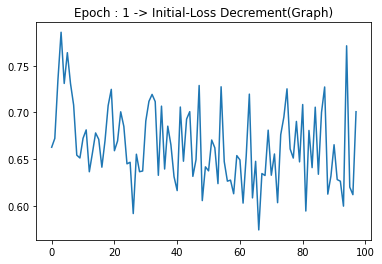

Epoch 2: 100%|██████████| 98/98 [16:06<00:00,  9.86s/batch, accuracy=89.7, loss=0.481]


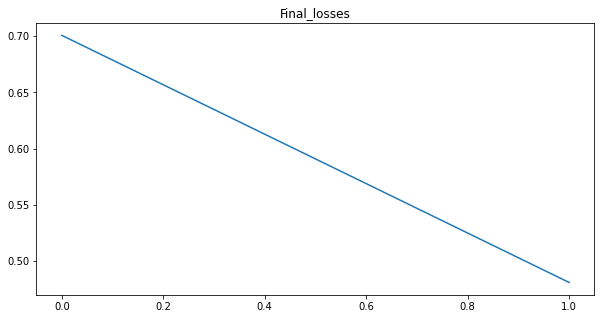

In [ ]:
model=model
learning_rate=0.01
valid_loss_min=np.Inf
loss_arr=[]
loss_epoch_arr=[]
train_accu=[]
test_accu=[]
max_epochs=2
flag=True
tottal_step=len(trainloader)
for epoch in range(1,max_epochs+1):
    with tqdm(trainloader, unit="batch") as tepoch: 
        for inputs,labels in tepoch:
            tepoch.set_description(f"Epoch {epoch}")
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
            loss=loss_fn(outputs,labels)
            loss.backward()
            with torch.no_grad():
              #all parameters_dictionary
              parameters_dict=model.state_dict(keep_vars=True)
              #weight_vector
              weight_param_info,weight_vector=dict_to_vector(model,parameters_dict)
              #gradient_vector
              gradient_param_info,gradient_vector=dict_to_vector(model,parameters_dict,True)# grad_tensor 
              #update_rule
              weight_vector = weight_vector-learning_rate*gradient_vector
              #new_parameters_dict   
              new_parameters_dict=vector_to_dict(model,parameters_dict,weight_param_info,weight_vector)
              #load the new parameters_dictionary
              model.load_state_dict(new_parameters_dict)
              del new_parameters_dict
             #making grad_zero
              model.zero_grad()  
            del inputs,labels,outputs
            torch.cuda.empty_cache
            loss_arr.append(loss.item()) 
            train_accuracy=evaluation(trainloader,model)
            if flag:
              initial_train_accuracy=train_accuracy
              initial_loss=loss 
            tepoch.set_postfix(loss=loss.item(),accuracy=train_accuracy)
            sleep(0.1)
            flag=False
    train_accu.append(train_accuracy)
    loss_epoch_arr.append(loss.item())
    if epoch==1:
      print(f'Initial-Loss : {initial_loss} Initial Accuracy : {initial_train_accuracy}')
      plt.plot(loss_arr)
      plt.title(f'Epoch : {epoch} -> Initial-Loss Decrement(Graph)')
      plt.show()   
plt.figure(figsize=(10,5))
plt.plot(loss_epoch_arr)
plt.title('Final_losses')
plt.show()